# NA LCS Data Visualizations - Spring Split

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pyodbc
from matplotlib.ticker import FuncFormatter

conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=localhost;"
                      "Database=NA LCS;"
                      "Trusted_Connection=yes;")
cursor = conn.cursor()

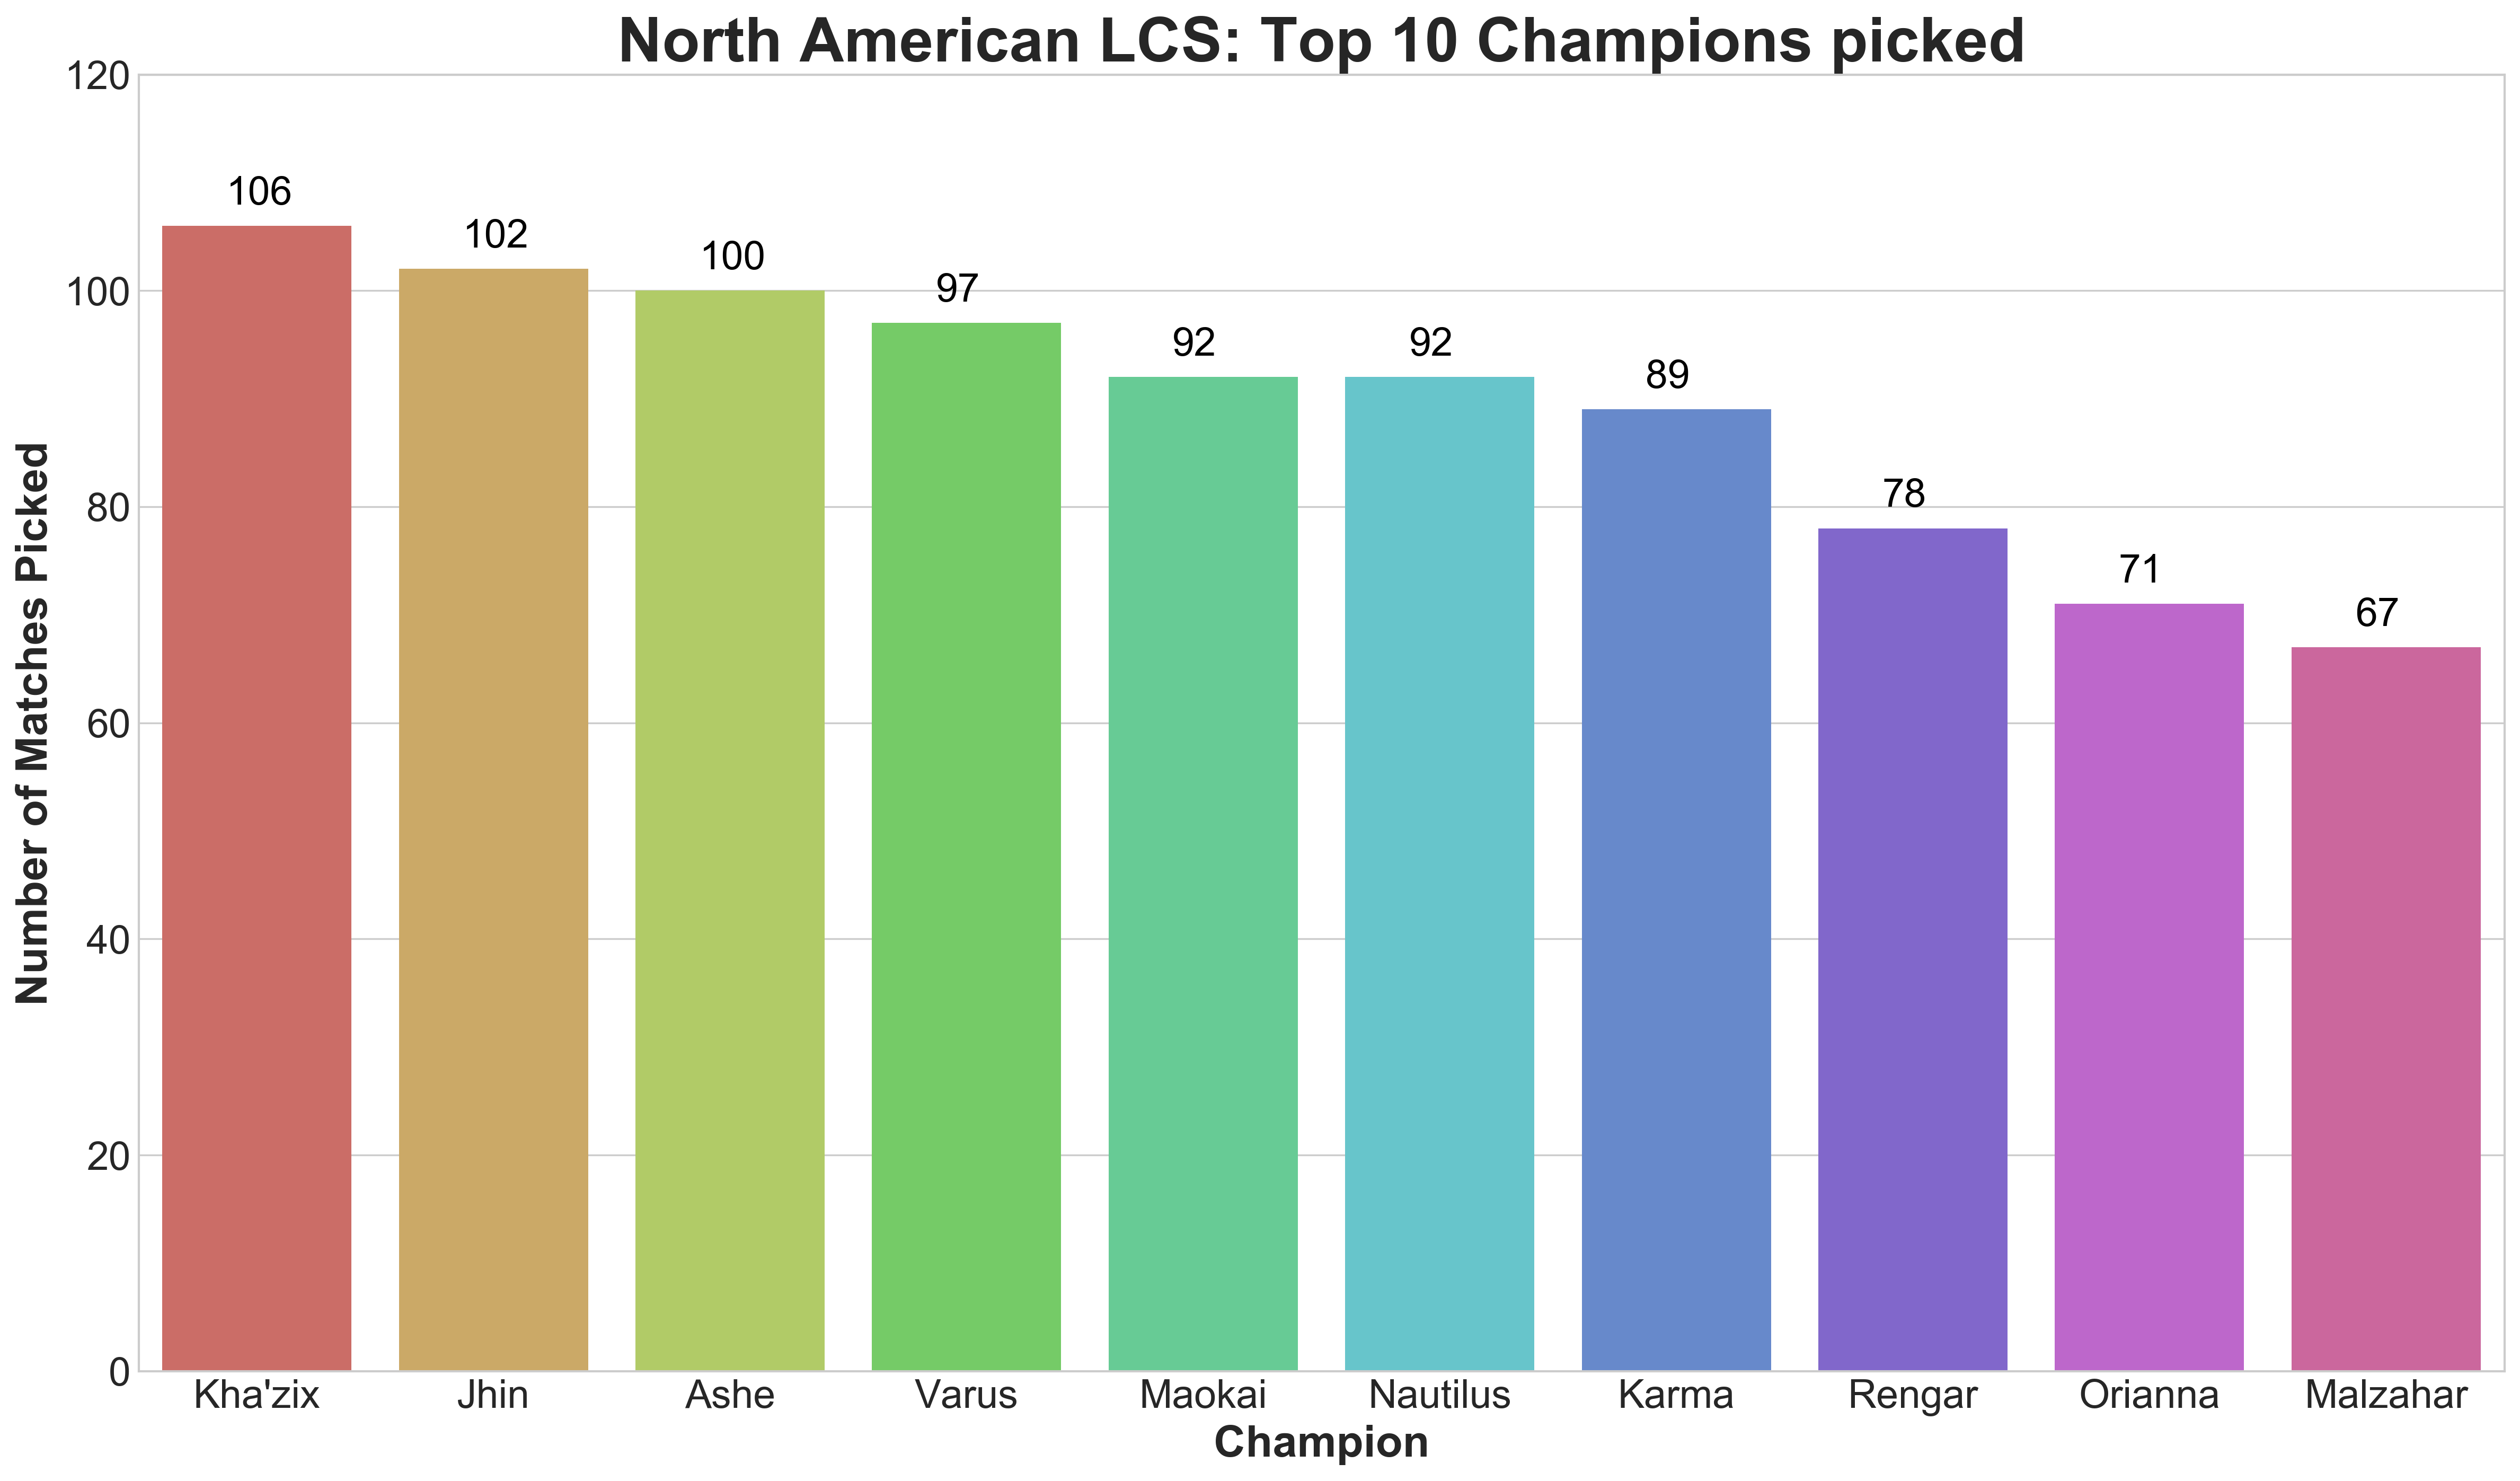

In [18]:
df = pd.read_sql_query('''
SELECT TOP (10)
	champion AS 'Champion',
	COUNT(gameid) AS 'Number of Matches Picked'
FROM [NA LCS].[dbo].[Mart_Players]
WHERE split = '2017-1'
GROUP BY Champion
ORDER BY [Number of Matches Picked] DESC
''', conn)

# Set Figure Size and DPI
fig = plt.figure(figsize = (19.20, 10.80), dpi = 300)

# Plot Points
ax = sns.barplot(x = "Champion", y = "Number of Matches Picked",
                 data = df,
                 palette = "hls")

# Title, X-Axis Label, Y-Axis Label
plt.title('North American LCS: Top 10 Champions Picked', size = 28, fontweight = 'bold')
plt.xlabel('Champion', size = 20, fontweight = 'bold')
plt.ylabel('Number of Matches Picked', size = 20, fontweight = 'bold')

# Ticks larger
plt.xticks(size = 18)
plt.yticks(size = 18)

# Set Ticks
plt.ylim(0, 120)

# Label Data Points
[ax.text(p[0] - .13, p[1] + 2, p[1], color = 'black', fontsize = 18) for p in zip(ax.get_xticks(), df['Number of Matches Picked'])]

# Show Graph and Dataframe
plt.show()

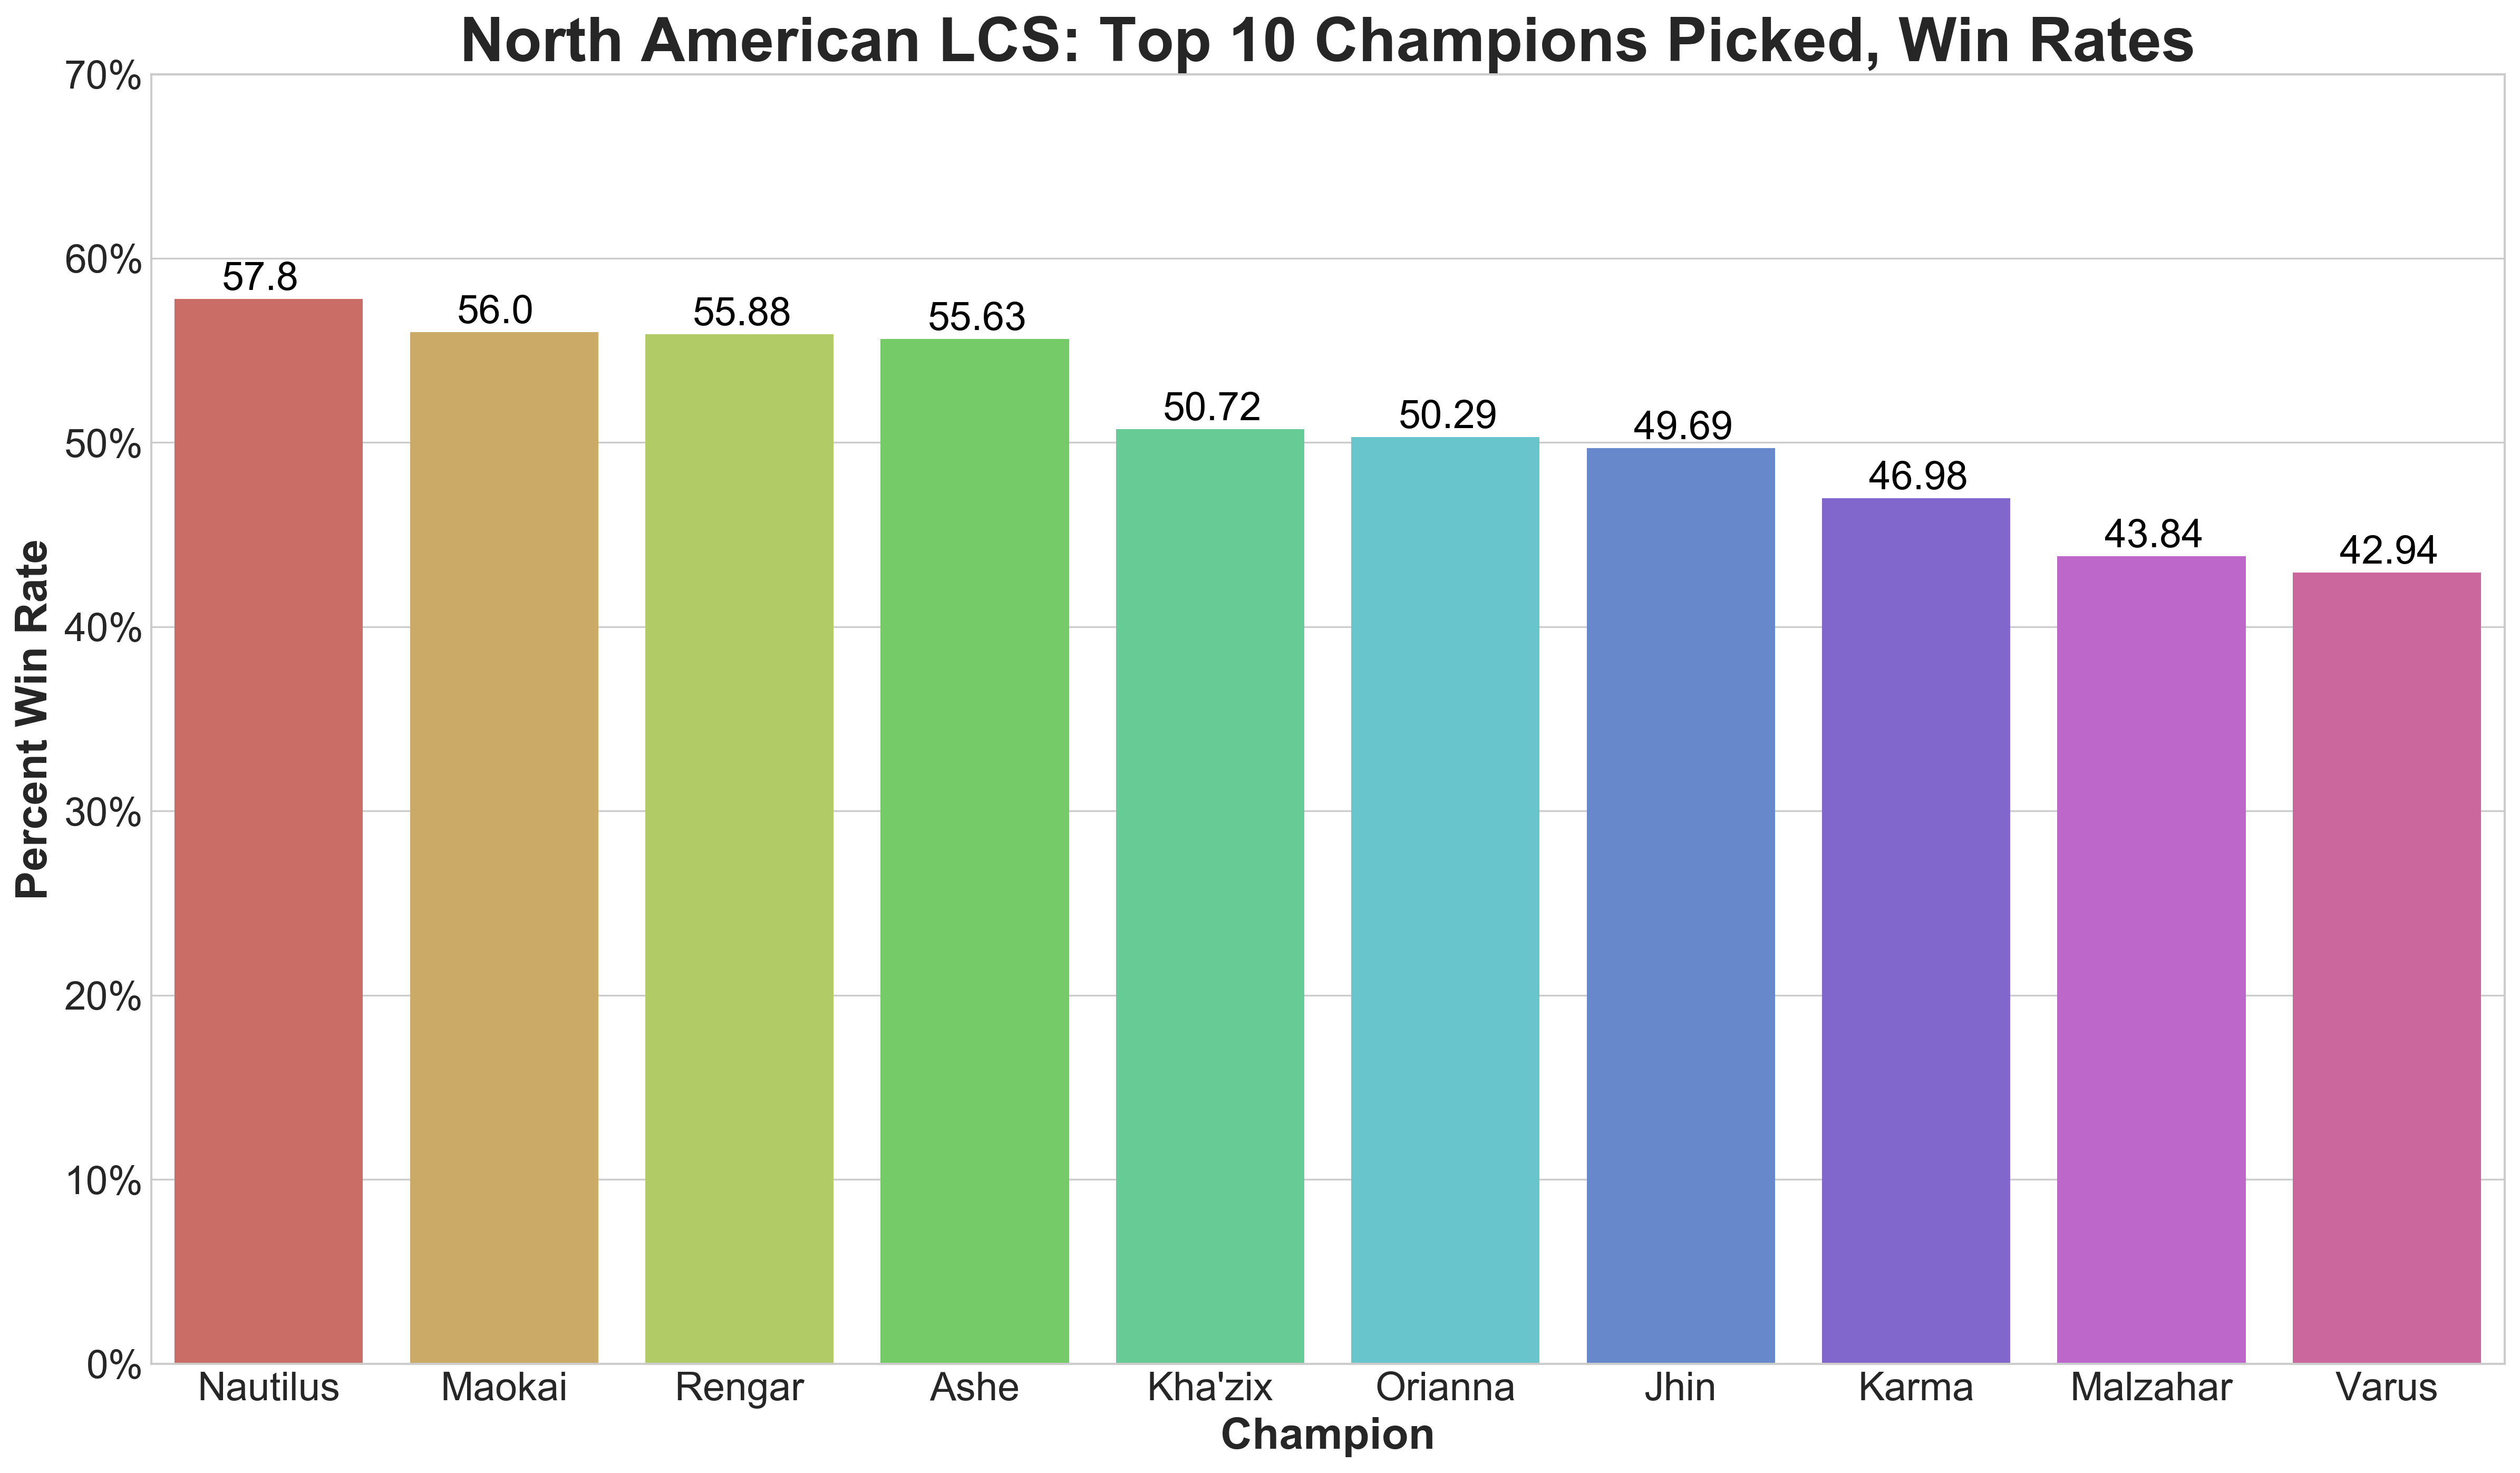

In [39]:
df = pd.read_sql_query('''
SELECT
	T1.champion AS 'Champion',
	ROUND(AVG(CASE WHEN result = 1 THEN 1.0 ELSE 0.0 END), 4) AS 'Average Win Rate'
FROM [NA LCS].[dbo].[Mart_Players] AS T1
INNER JOIN (
	SELECT TOP (10)
		champion AS 'Champion',
		COUNT(gameid) AS 'Number of Matches Picked'
	FROM [NA LCS].[dbo].[Mart_Players]
	WHERE split = '2017-1'
	GROUP BY Champion
	ORDER BY [Number of Matches Picked] DESC
) AS T2
ON T1.champion = T2.Champion
GROUP BY T1.champion
ORDER BY [Average Win Rate] DESC
''', conn)

# Set Figure Size and DPI
fig = plt.figure(figsize = (19.20, 10.80), dpi = 300)

# Plot Points
ax = sns.barplot(x = "Champion", y = "Average Win Rate",
                 data = df,
                 palette = "hls")

# Title, X-Axis Label, Y-Axis Label
plt.title('North American LCS: Top 10 Champions Picked, Win Rates', size = 28, fontweight = 'bold')
plt.xlabel('Champion', size = 20, fontweight = 'bold')
plt.ylabel('Percent Win Rate', size = 20, fontweight = 'bold')

# Ticks larger
plt.xticks(size = 18)
plt.yticks(size = 18)

# Set Ticks
plt.ylim(0, 0.70)

# Set Y-Axis to be in Percentage Form
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Label Data Points
[ax.text(p[0] - .2, p[1] + .005, round(p[1] * 100, 4), color = 'black', fontsize = 18) for p in zip(ax.get_xticks(), df["Average Win Rate"])]

# Show Graph and Dataframe
plt.show()

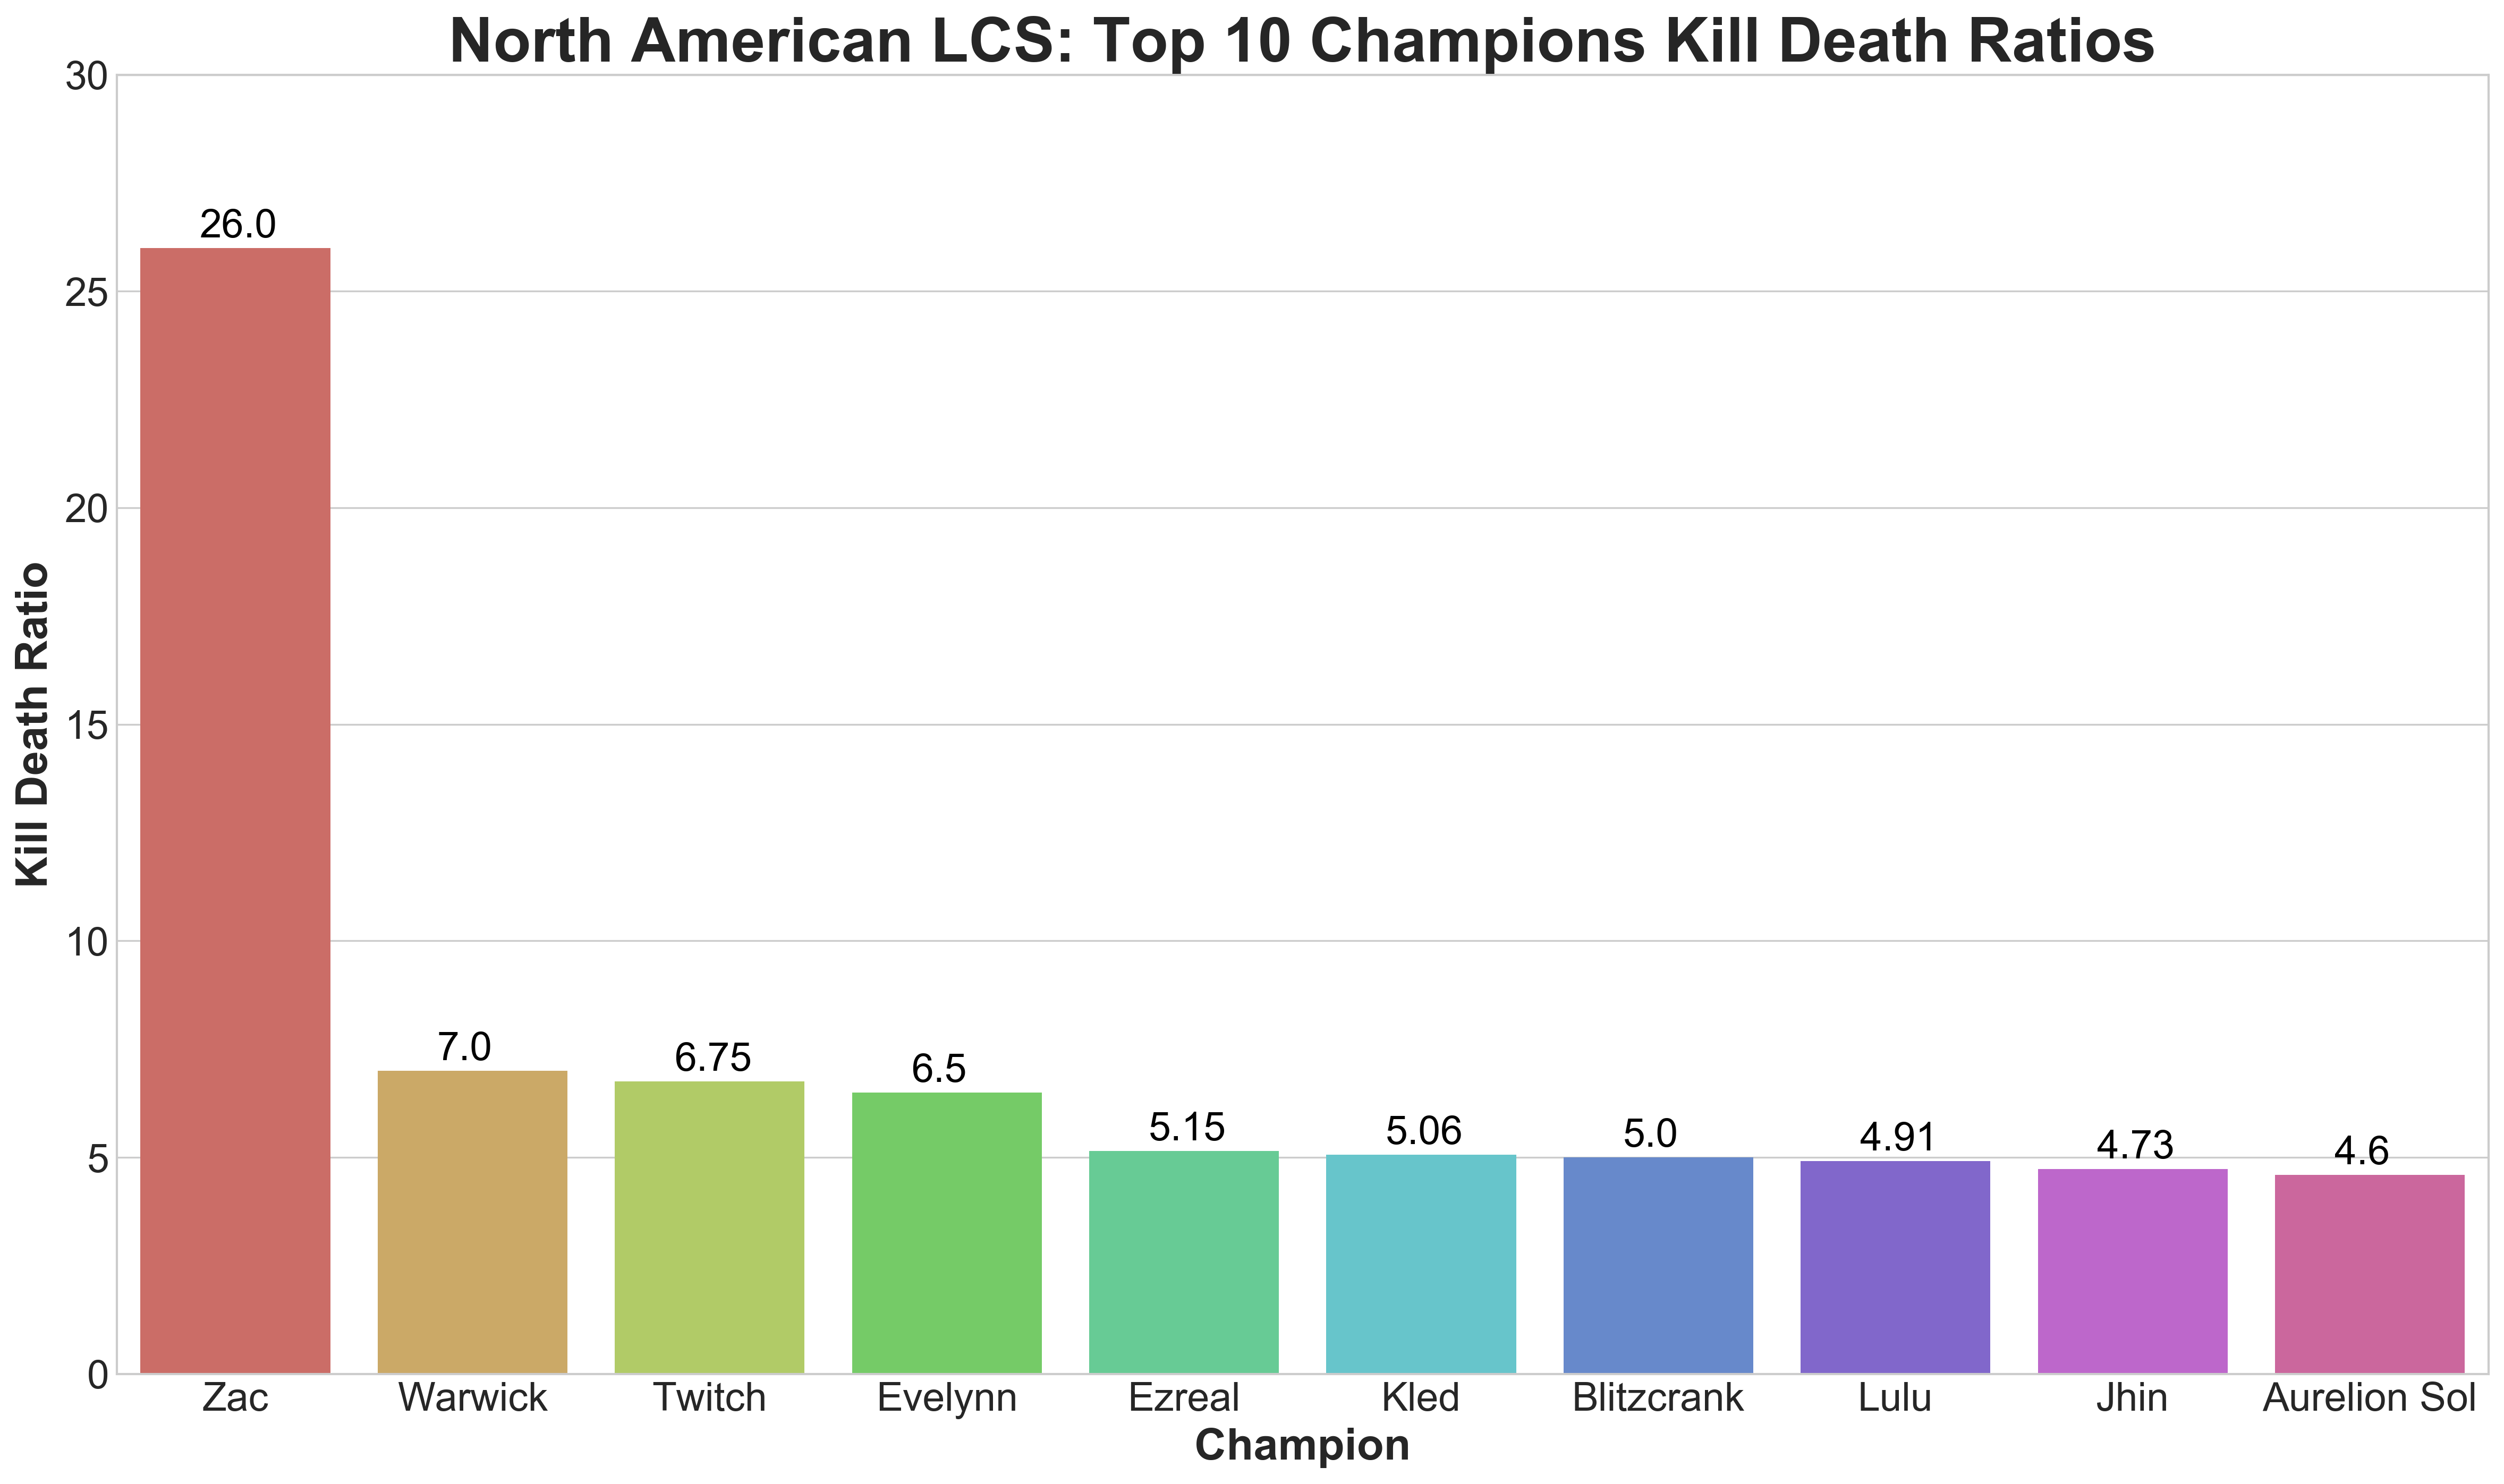

In [50]:
df = pd.read_sql_query('''
SELECT TOP (10)
	champion AS 'Champion',
	SUM(k) AS 'Number of Kills',
	SUM(a) AS 'Number of Assists',
	SUM(d) AS 'Number of Deaths',
	ROUND((SUM(k) + SUM(a)) / SUM(d), 2) AS 'KDA'
FROM [NA LCS].[dbo].[Mart_Players]
WHERE split = '2017-1'
GROUP BY champion
ORDER BY KDA DESC
''', conn)

# Set Figure Size and DPI
fig = plt.figure(figsize = (19.20, 10.80), dpi = 300)

# Plot Points
ax = sns.barplot(x = "Champion", y = "KDA",
                 data = df,
                 palette = "hls")

# Title, X-Axis Label, Y-Axis Label
plt.title('North American LCS: Top 10 Champions Kill Death Ratios', size = 28, fontweight = 'bold')
plt.xlabel('Champion', size = 20, fontweight = 'bold')
plt.ylabel('Kill Death Ratio', size = 20, fontweight = 'bold')

# Ticks larger
plt.xticks(size = 18)
plt.yticks(size = 18)

# Set Ticks
plt.ylim(0, 30)

# Label Data Points
[ax.text(p[0] - .15, p[1] + 0.25, p[1], color = 'black', fontsize = 18) for p in zip(ax.get_xticks(), df["KDA"])]

# Show Graph and Dataframe
plt.show()

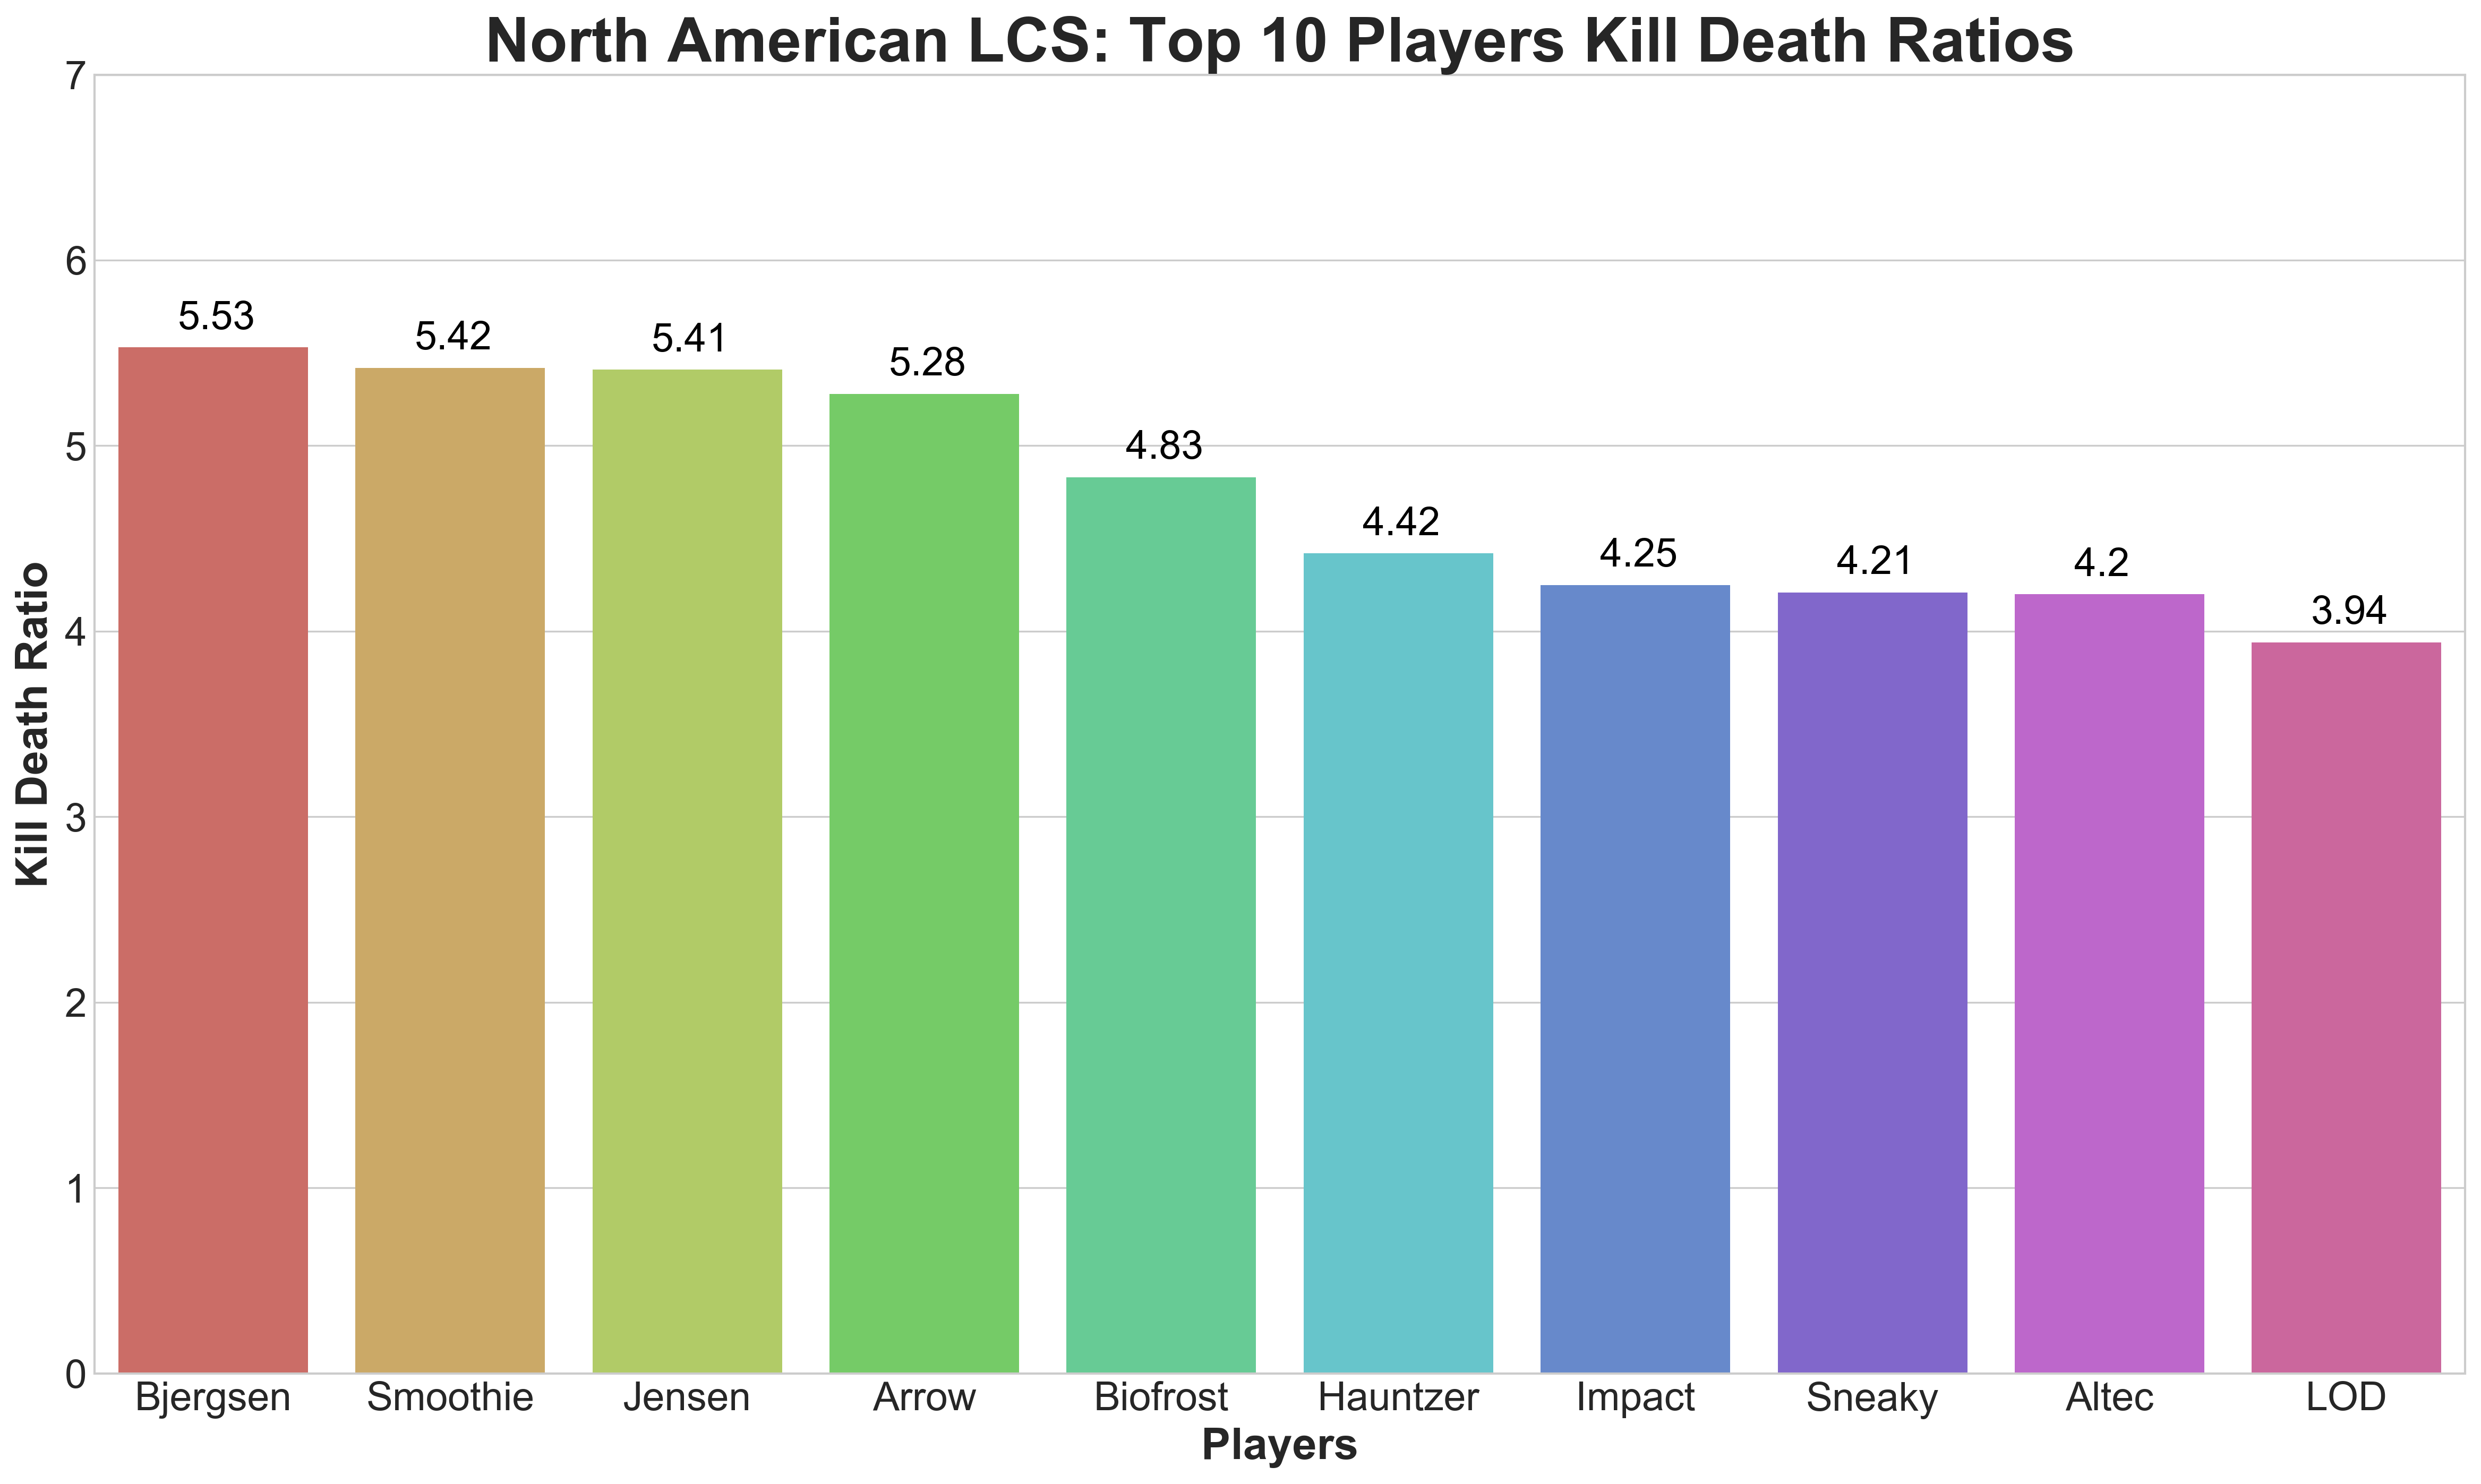

In [75]:
df = pd.read_sql_query('''
SELECT TOP (10)
	player AS 'Player',
	SUM(k) AS 'Number of Kills',
	SUM(a) AS 'Number of Assists',
	SUM(d) AS 'Number of Deaths',
	ROUND((SUM(k) + SUM(a)) / SUM(d), 2) AS 'KDA'
FROM [NA LCS].[dbo].[Mart_Players]
WHERE split = '2017-1'
GROUP BY player
ORDER BY KDA DESC
''', conn)

# Set Figure Size and DPI
fig = plt.figure(figsize = (19.20, 10.80), dpi = 300)

# Plot Points
ax = sns.barplot(x = "Player", y = "KDA",
                 data = df,
                 palette = "hls")

# Title, X-Axis Label, Y-Axis Label
plt.title('North American LCS: Top 10 Players Kill Death Ratios', size = 28, fontweight = 'bold')
plt.xlabel('Players', size = 20, fontweight = 'bold')
plt.ylabel('Kill Death Ratio', size = 20, fontweight = 'bold')

# Ticks larger
plt.xticks(size = 18)
plt.yticks(size = 18)

# Set Ticks
plt.ylim(0, 7)

# Label Data Points
[ax.text(p[0] - .15, p[1] + 0.1, p[1], color = 'black', fontsize = 18) for p in zip(ax.get_xticks(), df["KDA"])]

# Show Graph and Dataframe
plt.show()

(0, 6)

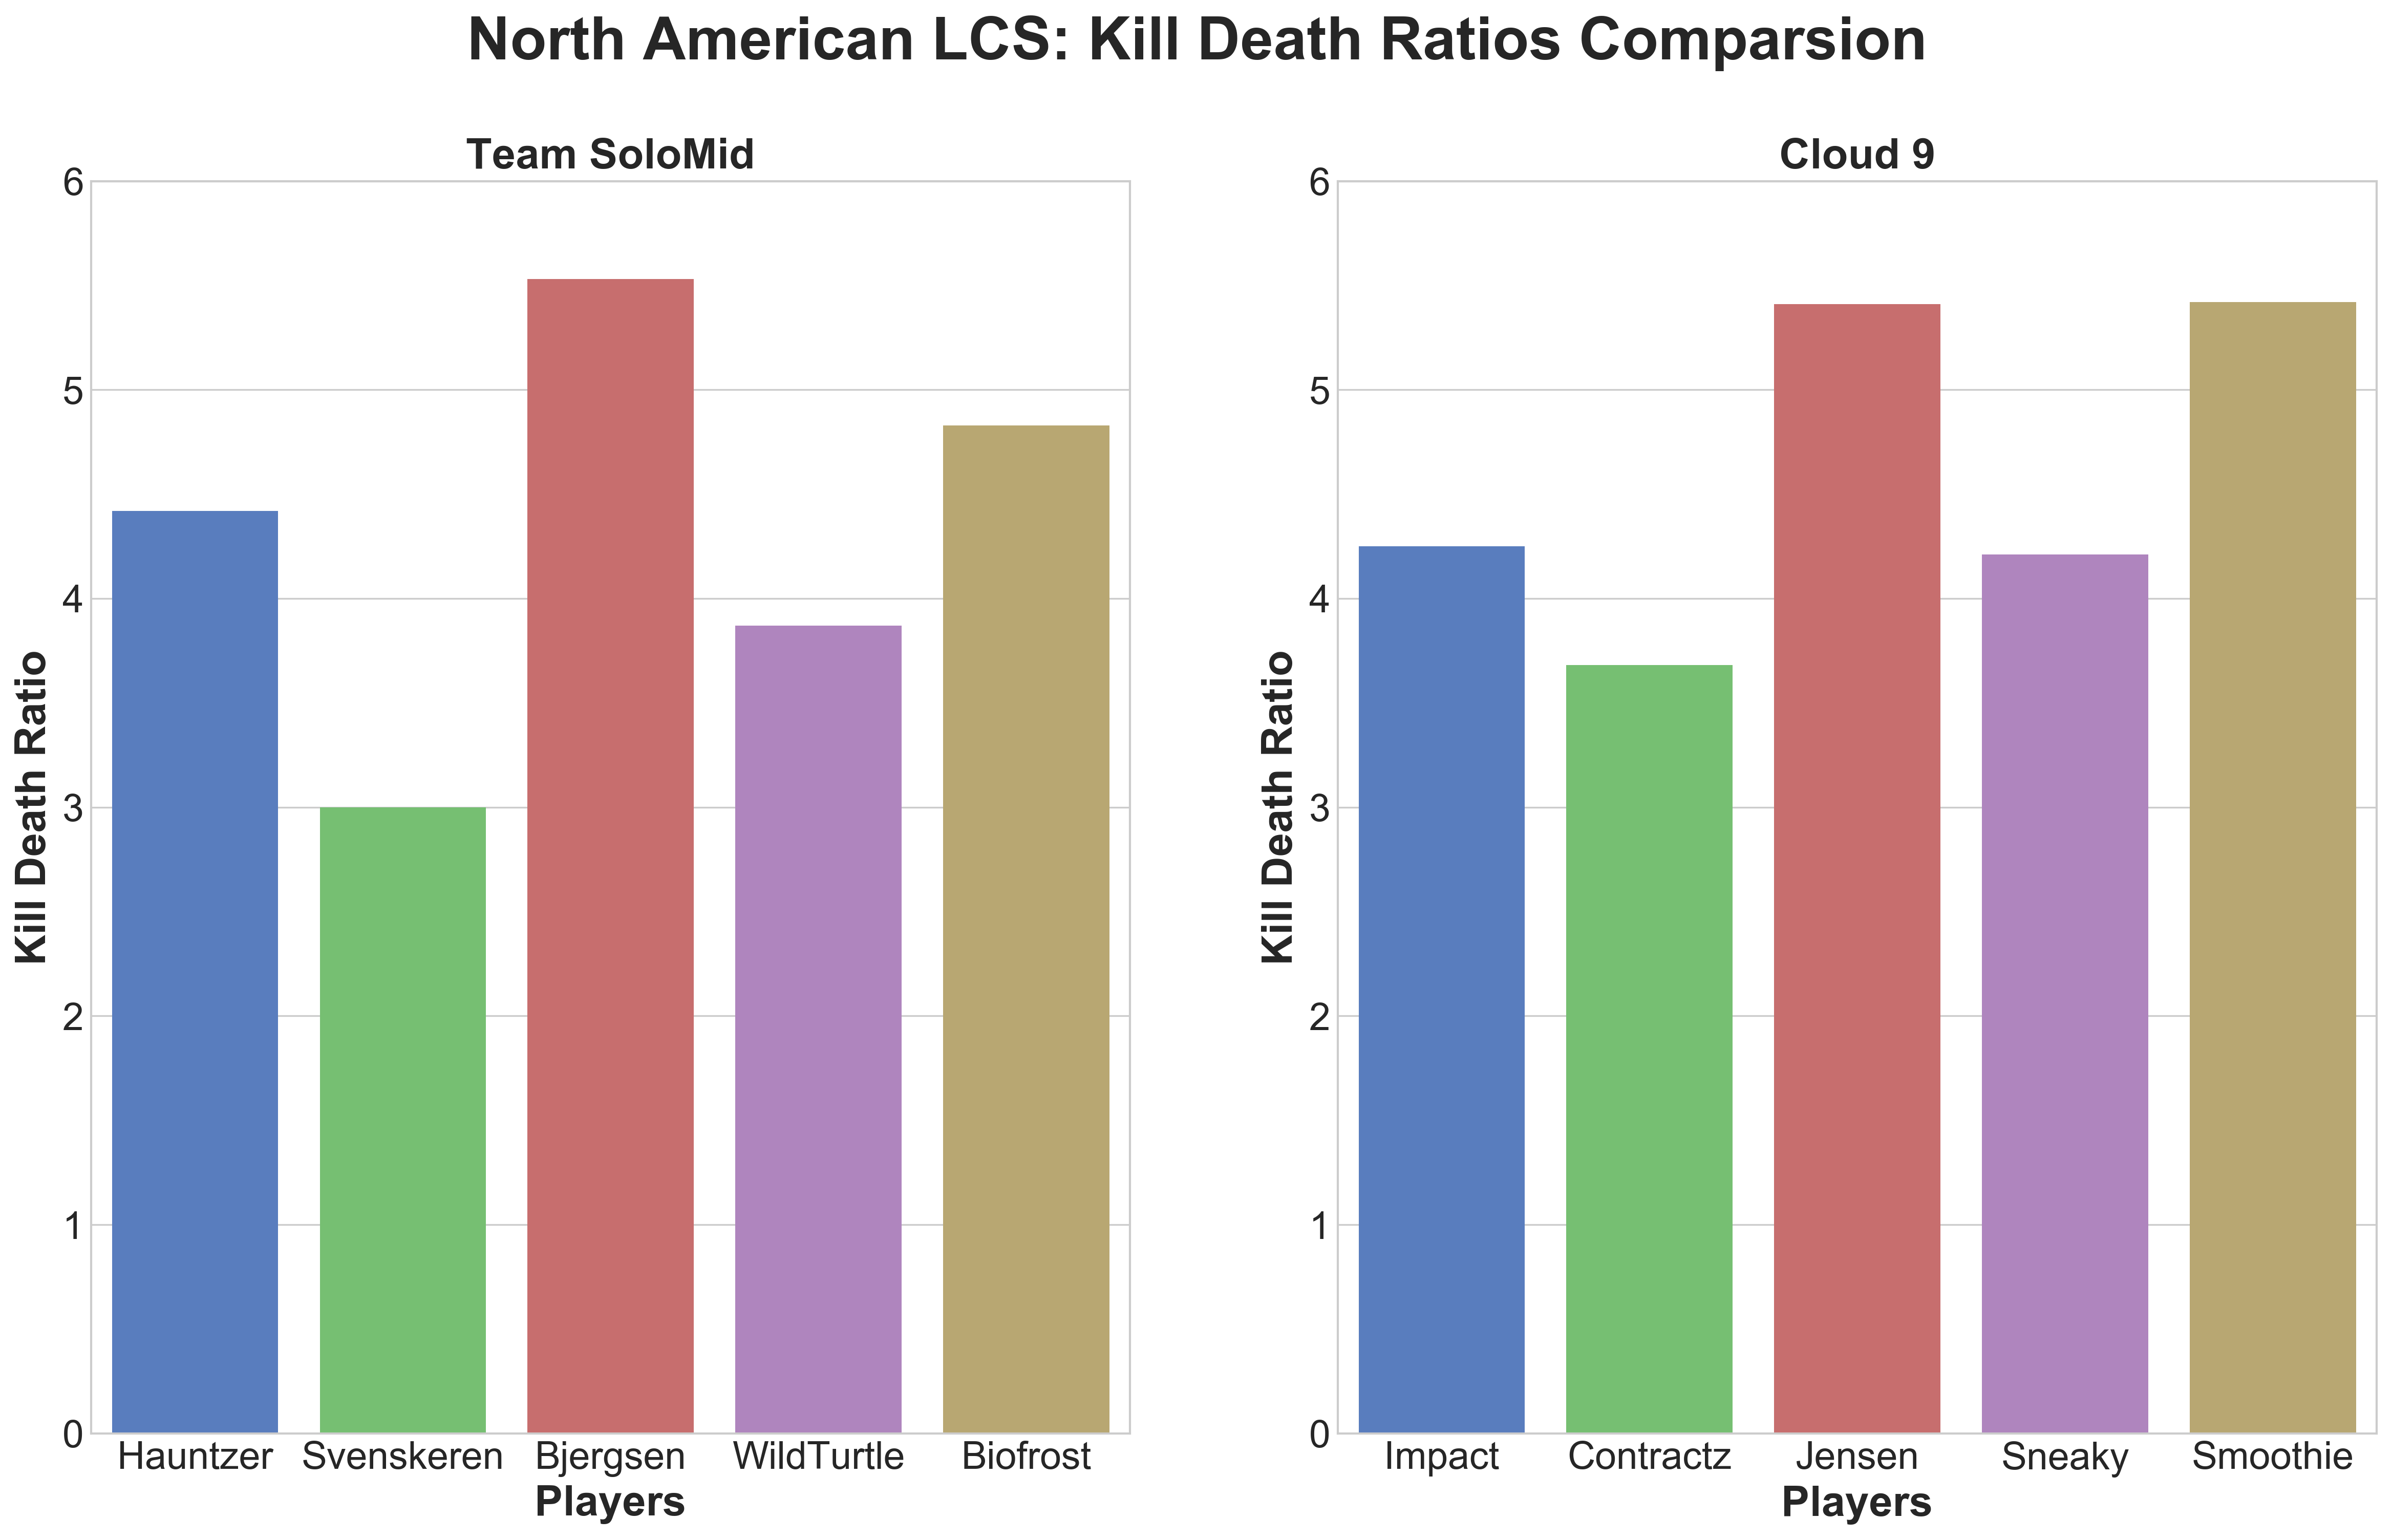

In [118]:
df1 = pd.read_sql_query('''
SELECT TOP (10)
	player AS 'Player',
	SUM(k) AS 'Number of Kills',
	SUM(a) AS 'Number of Assists',
	SUM(d) AS 'Number of Deaths',
	ROUND((SUM(k) + SUM(a)) / SUM(d), 2) AS 'KDA'
FROM [NA LCS].[dbo].[Mart_Players]
WHERE split = '2017-1'
AND team IN ('Team SoloMid')
GROUP BY player
ORDER BY KDA DESC
''', conn)

df2 = pd.read_sql_query('''
SELECT TOP (10)
	player AS 'Player',
	SUM(k) AS 'Number of Kills',
	SUM(a) AS 'Number of Assists',
	SUM(d) AS 'Number of Deaths',
	ROUND((SUM(k) + SUM(a)) / SUM(d), 2) AS 'KDA'
FROM [NA LCS].[dbo].[Mart_Players]
WHERE split = '2017-1'
AND team IN ('Cloud9')
GROUP BY player
ORDER BY KDA DESC
''', conn)

# Set Figure Size and DPI
fig, ax = plt.subplots(figsize = (19.20, 10.80), dpi = 300, ncols = 2)

# Plot Points
bar1 = sns.barplot(x = "Player", y = "KDA",
                 data = df1,
                 ax = ax[0],
                 palette = "muted",
                 order = ['Hauntzer', 'Svenskeren', 'Bjergsen', 'WildTurtle', 'Biofrost'])

bar2 = sns.barplot(x = "Player", y = "KDA",
                 data = df2,
                 ax = ax[1],
                 palette = "muted",
                 order = ['Impact', 'Contractz', 'Jensen', 'Sneaky', 'Smoothie'])

# Title, X-Axis Label, Y-Axis Label
plt.suptitle('North American LCS: Kill Death Ratios Comparsion', size = 28, fontweight = 'bold')
bar1.set_title('Team SoloMid', size = 20, fontweight = 'bold')
bar2.set_title('Cloud 9', size = 20, fontweight = 'bold')


# Set Labels - Bar1
bar1.set_xlabel('Players', size = 20, fontweight = 'bold')
bar1.set_ylabel('Kill Death Ratio', size = 20, fontweight = 'bold')

# Set Labels - Bar2
bar2.set_xlabel('Players', size = 20, fontweight = 'bold')
bar2.set_ylabel('Kill Death Ratio', size = 20, fontweight = 'bold')

# Ticks larger
bar1.tick_params(labelsize = 18)
bar2.tick_params(labelsize = 18)

# Set Y-Axis Limits
bar1.set_ylim(0, 6)
bar2.set_ylim(0, 6)